## **INSTALL AND IMPORT**

In [65]:
!pip install praw                  # for accessing Reddit's API
!pip install vaderSentiment        # for performing sentiment analysis
!pip install yfinance              # for fetching stock price data

In [66]:
#Scraping Reddit Posts:
import praw                        # Reddit wrapper used to acess Reddit post
import pandas as pd
from datetime import datetime
import re                          # regular expression for text matching
import yfinance as yf              # to fetch stock market data directly from yahoo finance

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

## **SCRAPING DATA FROM REDDIT**

In [67]:
# Reddit API credentials
reddit = praw.Reddit(
    client_id='InCPNRsho1TrqNlw1U9-Rw',
    client_secret='DPNoyCWrdQmFjsoD50QPMdxg1ixoAg',
    user_agent='StockSentimentApp by u/Sad-Tie822')


In [68]:
# Subreddit to target
subreddit = reddit.subreddit("wallstreetbets")

In [69]:
# Query specific stocks
#query = "stocks OR stock market OR specific_stock_name"
query =  "TSLA"

# Extract latest 1000 posts
posts = []
for submission in subreddit.search(query, limit=1000):
    posts.append([submission.title, submission.selftext, submission.score, submission.created_utc])

# Creating a  DataFrame to store extracted data
df = pd.DataFrame(posts, columns=['Title', 'Text', 'Upvotes', 'Created_At'])
df['Created_At'] = df['Created_At'].apply(lambda x: datetime.utcfromtimestamp(x))

# Save DataFrame for analysis
df.to_csv('reddit_stock_data.csv', index=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



## **EDA**

In [70]:
df.head(5)

,Title,Text,Upvotes,Created_At
0,Who thinks TSLA is going to miss earnings beca...,TSLA is having an enormous problem. First off ...,1866,2024-09-24 00:37:13
1,$98k YOLO on $TSLA 10/18 calls. Tesla is going...,Not financial advice,382,2024-10-02 14:18:37
2,Calling the top on $TSLA. Change my mind,"1. Sales. Tesla sales are down, and I think th...",223,2024-09-08 20:09:31
3,Why I’m short TSLA and you should be too,First their delivery numbers for Q3 will be lo...,254,2024-06-29 15:57:28
4,Robotaxis will not be a trillion dollar business,I fail to see the trillions business that Musk...,3900,2024-10-05 17:51:32


In [71]:
df.tail(5)

,Title,Text,Upvotes,Created_At
230,"Don't mind me, just sitting here enjoying the ...",,2285,2020-09-23 08:31:18
231,"Just dropped $111K on 0DTE TSLA $980Cs, wish m...",,898,2022-01-21 15:02:12
232,The TSLA Bear vs Bull,,696,2023-09-02 15:52:20
233,$2880 to $28k in TSLA puts in 90 mins. now onl...,,1021,2023-08-05 07:24:50
234,SOLD TSLA for GME sorry Papa Musk🚀💎🙌,,2715,2021-03-04 18:49:45


In [72]:
df.shape

(235, 4)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       235 non-null    object        
 1   Text        235 non-null    object        
 2   Upvotes     235 non-null    int64         
 3   Created_At  235 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.5+ KB


In [74]:
df.describe()

,Upvotes,Created_At
count,235.000000,235
mean,5814.557447,2022-07-29 11:03:23.412765952
min,0.000000,2019-03-17 12:34:51
25%,1392.500000,2021-02-24 02:06:13.500000
50%,2543.000000,2022-12-06 14:37:29
75%,5470.000000,2023-12-28 09:03:16
max,54155.000000,2024-10-11 15:41:59
std,8391.357543,NaN


In [75]:
# to check missing value in data set
print(df.isnull().sum())

Title         0
Text          0
Upvotes       0
Created_At    0
dtype: int64


In [76]:
# Total post where stock is mentioned explicitly
# This iterates through each post and prints out how many unique posts explicitly mention the stock (in this case, Tesla) from the dataframe that we extracted from reddit.

unique_post_count = 0
for index, row in df.iterrows():
    # Check if 'TSLA' appears at least once in either the Title or the Text
    if re.search(r'\b' + re.escape(query) + r'\b', row['Title'], re.IGNORECASE) or re.search(r'\b' + re.escape(query) + r'\b', row['Text'], re.IGNORECASE):
        unique_post_count += 1  # Count the post once, no matter how many times 'TSLA' appears

print(f'The stock "{query}" was mentioned in {unique_post_count} unique posts.')



The stock "TSLA" was mentioned in 234 unique posts.


## **Frequency of mentions for specific stocks or market trends**







This  collects posts from the "r/wallstreetbets" subreddit, checks how many of those posts mention the stock symbol "TSLA," and provides a summary of the total mentions within a specified date range.
The process includes filtering based on date, extracting relevant post details, and utilizing regular expressions for accurate matching.

In [77]:
# Total post that mentioned the stock in last 1000 posts

# Specify the stock symbol and time range
stock_symbol = "TSLA"
start_date = datetime(2019, 1, 1)  # Start date for analysis
end_date = datetime(2024, 10, 1)    # End date for analysis


In [78]:
# Initialize mention count and list for posts
mention_count = 0
posts = []

# Fetch posts from the subreddit
for submission in reddit.subreddit("wallstreetbets").new(limit=1000):
    post_date = datetime.utcfromtimestamp(submission.created_utc)  # Convert UTC timestamp to datetime

    # Stop processing if the post is older than the start date
    if post_date < start_date:
        break

    # Only consider posts within the specified date range
    if start_date <= post_date <= end_date:
        posts.append([submission.title, submission.selftext, submission.score, submission.created_utc])

        # Check for mentions of the stock symbol in title and text
        if re.search(r'\b' + re.escape(stock_symbol) + r'\b', submission.title, re.IGNORECASE) or \
           re.search(r'\b' + re.escape(stock_symbol) + r'\b', submission.selftext, re.IGNORECASE):
            mention_count += 1  # Increment mention count if found


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [79]:
# Create a DataFrame from the collected posts
dt = pd.DataFrame(posts, columns=['Title', 'Text', 'Upvotes', 'Created_At'])
dt['Created_At'] = pd.to_datetime(dt['Created_At'], unit='s')  # Convert Created_At to datetime

# Display the frequency of mentions
print(f'The stock "{stock_symbol}" was mentioned {mention_count} times between {start_date.date()} and {end_date.date()}.')

The stock "TSLA" was mentioned 6 times between 2019-01-01 and 2024-10-01.


The output indicating that the stock "TSLA" was mentioned 6 times between 2019-01-01 and 2024-10-01 provides a summary of the analysis conducted on posts from the r/wallstreetbets subreddit.

The count of 6 signifies that within the last 1,000 posts analyzed from r/wallstreetbets, only 6 posts explicitly mentioned "TSLA." This may reflect relatively low interest in Tesla stock during that time frame on this subreddit, at least in the most recent posts.

A low number of mentions could imply that the sentiment around Tesla in this subreddit might not be as strong compared to other stocks or companies frequently discussed by users. Alternatively, it could mean that discussions about Tesla are happening but are not being captured in the most recent posts.


## **SENTIMENT ANALYSIS WITH VADER**

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# to takes a text input, uses the sentiment analyzer to calculate sentiment scores, and returns the compound score.
def compute_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the sentiment function to the 'Text' column
df['Sentiment'] = df['Text'].apply(compute_sentiment)

# Classify sentiment as Positive, Negative, or Neutral
df['Sentiment_Label'] = df['Sentiment'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))

# Save sentiment analysis results
df.to_csv('reddit_stock_sentiment.csv', index=False)
df.head(5)


,Title,Text,Upvotes,Created_At,Sentiment,Sentiment_Label
0,Who thinks TSLA is going to miss earnings beca...,TSLA is having an enormous problem. First off ...,1866,2024-09-24 00:37:13,0.8383,Positive
1,$98k YOLO on $TSLA 10/18 calls. Tesla is going...,Not financial advice,382,2024-10-02 14:18:37,0.0000,Neutral
2,Calling the top on $TSLA. Change my mind,"1. Sales. Tesla sales are down, and I think th...",223,2024-09-08 20:09:31,0.9209,Positive
3,Why I’m short TSLA and you should be too,First their delivery numbers for Q3 will be lo...,254,2024-06-29 15:57:28,0.9904,Positive
4,Robotaxis will not be a trillion dollar business,I fail to see the trillions business that Musk...,3900,2024-10-05 17:51:32,0.6278,Positive


compute_sentiment to calculate sentiment scores for each post AND
adds sentiment scores to the DataFrame and classifies the posts as "Positive," "Negative," or "Neutral" based on the compound sentiment score.

In [81]:
df.tail(5)

,Title,Text,Upvotes,Created_At,Sentiment,Sentiment_Label
230,"Don't mind me, just sitting here enjoying the ...",,2285,2020-09-23 08:31:18,0.0,Neutral
231,"Just dropped $111K on 0DTE TSLA $980Cs, wish m...",,898,2022-01-21 15:02:12,0.0,Neutral
232,The TSLA Bear vs Bull,,696,2023-09-02 15:52:20,0.0,Neutral
233,$2880 to $28k in TSLA puts in 90 mins. now onl...,,1021,2023-08-05 07:24:50,0.0,Neutral
234,SOLD TSLA for GME sorry Papa Musk🚀💎🙌,,2715,2021-03-04 18:49:45,0.0,Neutral


In [82]:
#Calculate the average sentiment score:
average_sentiment = df['Sentiment'].mean()
print(f"Average Sentiment Score: {average_sentiment}")

Average Sentiment Score: 0.060042127659574465


An average sentiment score of 0.0600 suggests a slightly positive sentiment overall among the posts mentioning TSLA.
This score is close to zero, indicating that while the sentiment is slightly positive, it is not strongly favorable.

## **SENTIMENT POLARITY**

In [83]:
#Categorize sentiment:
df['Sentiment Category'] = pd.cut(df['Sentiment'],
                                   bins=[-1, -0.5, 0.5, 1],
                                   labels=['Negative', 'Neutral', 'Positive'])

sentiment_counts = df['Sentiment Category'].value_counts()
print(sentiment_counts)

Sentiment Category
Neutral     195
Positive     28
Negative     12
Name: count, dtype: int64


The high number of neutral posts (195) suggests that a significant portion of discussions around Tesla on this subreddit is informational or exploratory rather than opinionated.

The relatively low number of positive posts (28) indicates that while there is some optimism about Tesla, it is not the dominant sentiment.

The small number of negative posts (12) shows that while there are some criticisms or concerns, they are minimal compared to neutral and positive sentiments.

##  **COORELATION BETWEEN FEATURES (sentiments or mentions) & PRICE MOVEMENT**



To compare Reddit sentiment with actual stock performance, historical stock price data is retrieved. The yfinance library is used to download stock price data for Tesla (TSLA) over the same period covered by the Reddit posts.

In [84]:
# Download historical stock price data for a given stock symbol
stock_symbol = 'TSLA'
start_date = '2019-01-01'
end_date = '2024-10-01'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [85]:
# Display the downloaded stock data
stock_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2024-09-24,254.080002,257.190002,249.050003,254.270004,254.270004,88491000
2024-09-25,252.539993,257.049988,252.279999,257.019989,257.019989,65034300
2024-09-26,260.600006,261.750000,251.529999,254.220001,254.220001,67142200


In [86]:
#Resets the index of stock_data, converting the date index into a regular column, and stores the result in stock_data_reset
stock_data_reset = stock_data.reset_index()

stock_data_reset.to_csv('his_stock_data.csv', index=False)
dt2 = pd.read_csv('his_stock_data.csv')
dt2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
1,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
3,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
4,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [87]:
# Convert the 'Created_At' column to a datetime format
df['Created_At'] = pd.to_datetime(df['Created_At'])

In [88]:
# Group sentiment data by date and aggregate sentiments
daily_sentiment = df.groupby(df['Created_At'].dt.date).agg({
    'Sentiment_Label': lambda x: x.value_counts().to_dict(),  # Count of positive, negative, neutral
    'Title': 'count'                                          # Number of mentions per day
}).reset_index()


In [89]:
# Rename 'Title' column to 'Mentions'
daily_sentiment.rename(columns={'Title': 'Mentions'}, inplace=True)


In [90]:
# Create separate columns for positive, negative, and neutral sentiments
# It extracts the count of positive,neagative and neutral sentiments from 'Sentiment_Label', defaulting to 0 if not found.
daily_sentiment['Positive'] = daily_sentiment['Sentiment_Label'].apply(lambda x: x.get('Positive', 0))
daily_sentiment['Negative'] = daily_sentiment['Sentiment_Label'].apply(lambda x: x.get('Negative', 0))
daily_sentiment['Neutral'] = daily_sentiment['Sentiment_Label'].apply(lambda x: x.get('Neutral', 0))

# Drop the original Sentiment_Label column
daily_sentiment.drop(columns='Sentiment_Label', inplace=True)

daily_sentiment.head()

,Created_At,Mentions,Positive,Negative,Neutral
0,2019-03-17,1,0,0,1
1,2019-04-24,1,0,0,1
2,2019-11-22,1,0,0,1
3,2019-11-24,1,0,0,1
4,2020-01-24,1,0,0,1


In [91]:
# Convert stock_data index (date) to a column to merge on date
stock_data.reset_index(inplace=True)

# Convert 'Created_At' column in daily_sentiment to datetime64[ns]
daily_sentiment['Created_At'] = pd.to_datetime(daily_sentiment['Created_At'])

# Merge stock data with daily sentiment data on date
merged_data = pd.merge(stock_data, daily_sentiment, left_on='Date', right_on='Created_At', how='left')

# Fill missing sentiment values with 0 (if there are days with no posts)
merged_data.fillna({'Positive': 0, 'Negative': 0, 'Neutral': 0, 'Stock': 0}, inplace=True)

merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,Created_At,Mentions,Positive,Negative,Neutral
0,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000,NaT,NaN,0.0,0.0,0.0
1,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000,NaT,NaN,0.0,0.0,0.0
2,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500,NaT,NaN,0.0,0.0,0.0
3,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000,NaT,NaN,0.0,0.0,0.0
4,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500,NaT,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2024-09-24,254.080002,257.190002,249.050003,254.270004,254.270004,88491000,2024-09-24,1.0,1.0,0.0,0.0
1442,2024-09-25,252.539993,257.049988,252.279999,257.019989,257.019989,65034300,2024-09-25,1.0,0.0,0.0,1.0
1443,2024-09-26,260.600006,261.750000,251.529999,254.220001,254.220001,67142200,NaT,NaN,0.0,0.0,0.0
1444,2024-09-27,257.380005,260.700012,254.119995,260.459991,260.459991,70988100,NaT,NaN,0.0,0.0,0.0


In [92]:
# Calculate daily stock price changes (percent change)
merged_data['Price_Change'] = merged_data['Close'].pct_change()  # Calculate percentage change in closing prices


In [93]:
# Calculate correlations
correlations1 = merged_data[[ 'Mentions', 'Price_Change']].corr()                       # correlation between mentions and price change
correlations2 = merged_data[['Positive','Negative','Neutral', 'Price_Change']].corr()   # correlation between price change and sentiments(positive ,negative and neutral)

# Display the correlation matrix
print(correlations1)
print(correlations2)


              Mentions  Price_Change
Mentions      1.000000      0.104381
Price_Change  0.104381      1.000000
              Positive  Negative   Neutral  Price_Change
Positive      1.000000  0.023797  0.065013      0.036923
Negative      0.023797  1.000000 -0.008831      0.010530
Neutral       0.065013 -0.008831  1.000000      0.061140
Price_Change  0.036923  0.010530  0.061140      1.000000


**Correlation between Mentions And Price change**

The correlation matrix shows that while there is a weak positive relationship between Mentions and Price_Change, it is not strong enough to imply a meaningful correlation.

**Correlation between Sentiments And Price change**

All the correlation values are close to zero, indicating weak relationships among the variables.
The weak correlations suggest that while there may be some interaction between sentiment and price change, they are not strongly tied to each other.

## **VISUALIZATIONS**

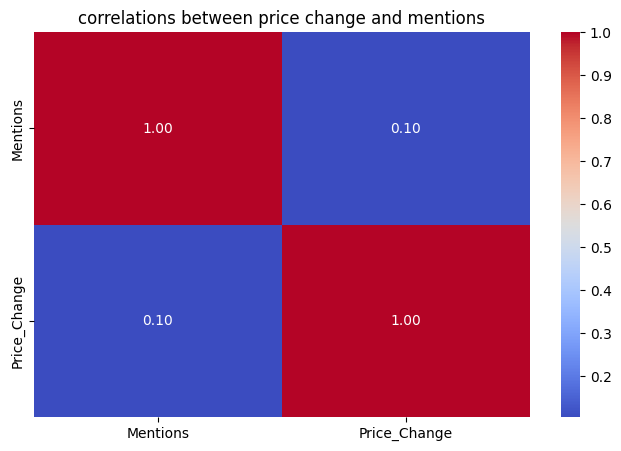

In [94]:
# Heatmap of the correlation matrix
# 1.correlation between mentions and price change
plt.figure(figsize=(8, 5))
sns.heatmap(correlations1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlations between price change and mentions')
plt.show()

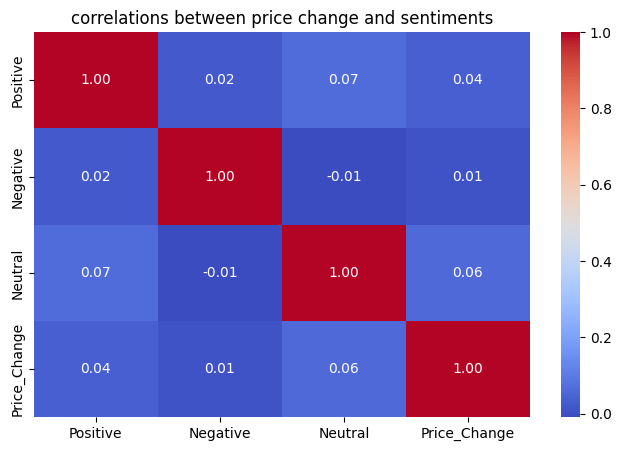

In [95]:
# 2.correlation between price change and sentiments
plt.figure(figsize=(8, 5))
sns.heatmap(correlations2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlations between price change and sentiments')
plt.show()

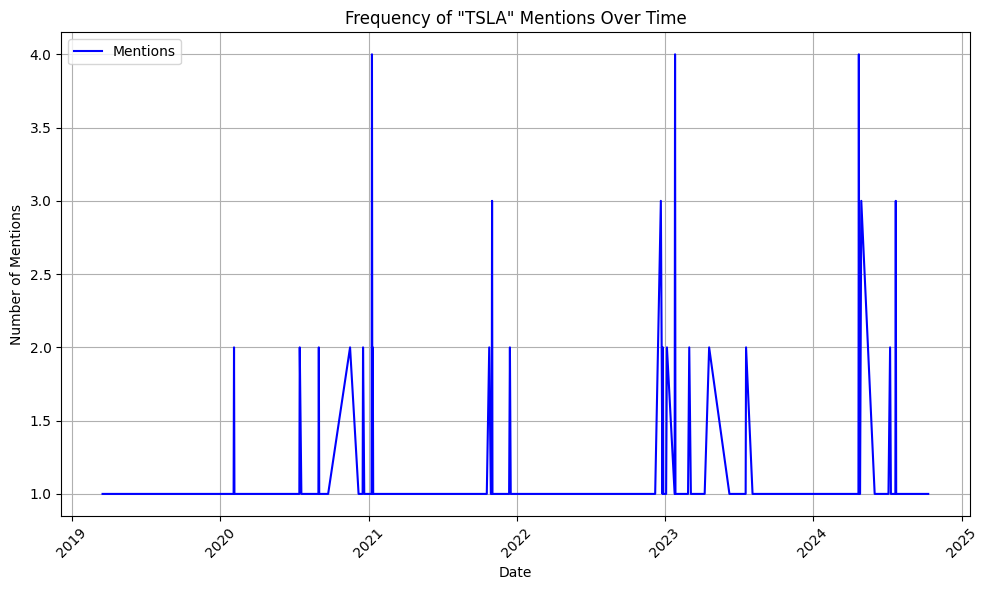

In [96]:
# frequency of mentions over time.

import matplotlib.pyplot as plt

# Plot number of mentions over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment['Created_At'], daily_sentiment['Mentions'], label='Mentions', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.title('Frequency of "TSLA" Mentions Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

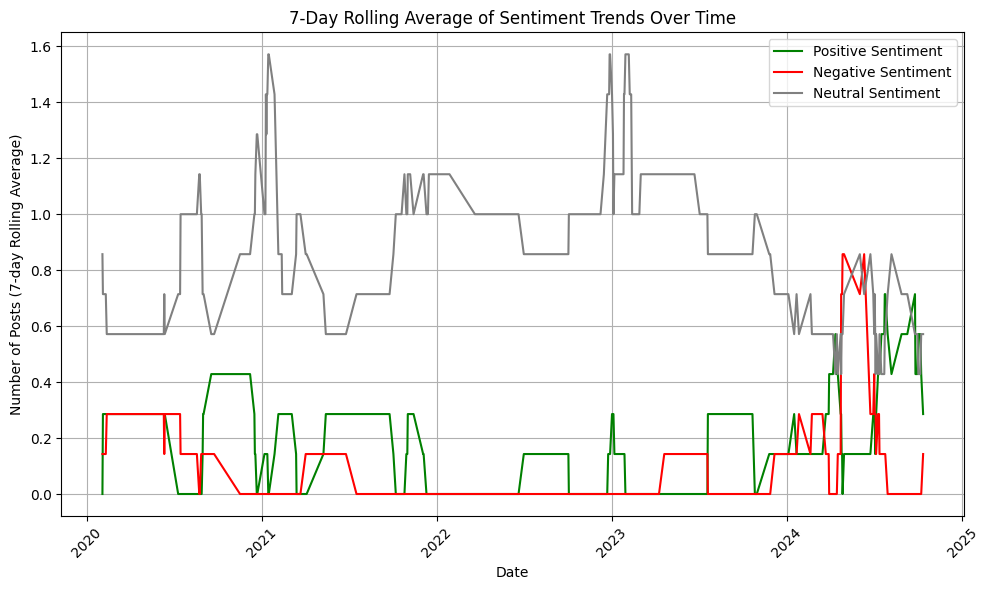

In [97]:
# Rolling average (7-day window) for sentiment trends
daily_sentiment['Positive_Rolling'] = daily_sentiment['Positive'].rolling(window=7).mean()
daily_sentiment['Negative_Rolling'] = daily_sentiment['Negative'].rolling(window=7).mean()
daily_sentiment['Neutral_Rolling'] = daily_sentiment['Neutral'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))

# Plot rolling averages
plt.plot(daily_sentiment['Created_At'], daily_sentiment['Positive_Rolling'], label='Positive Sentiment', color='green')
plt.plot(daily_sentiment['Created_At'], daily_sentiment['Negative_Rolling'], label='Negative Sentiment', color='red')
plt.plot(daily_sentiment['Created_At'], daily_sentiment['Neutral_Rolling'], label='Neutral Sentiment', color='gray')

plt.xlabel('Date')
plt.ylabel('Number of Posts (7-day Rolling Average)')
plt.title('7-Day Rolling Average of Sentiment Trends Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [98]:
# Convert 'Date' column to datetime objects with explicit timezone
dt2['Date'] = pd.to_datetime(dt2['Date']).dt.tz_localize(None)
daily_sentiment['Created_At'] = pd.to_datetime(daily_sentiment['Created_At']).dt.tz_localize(None)


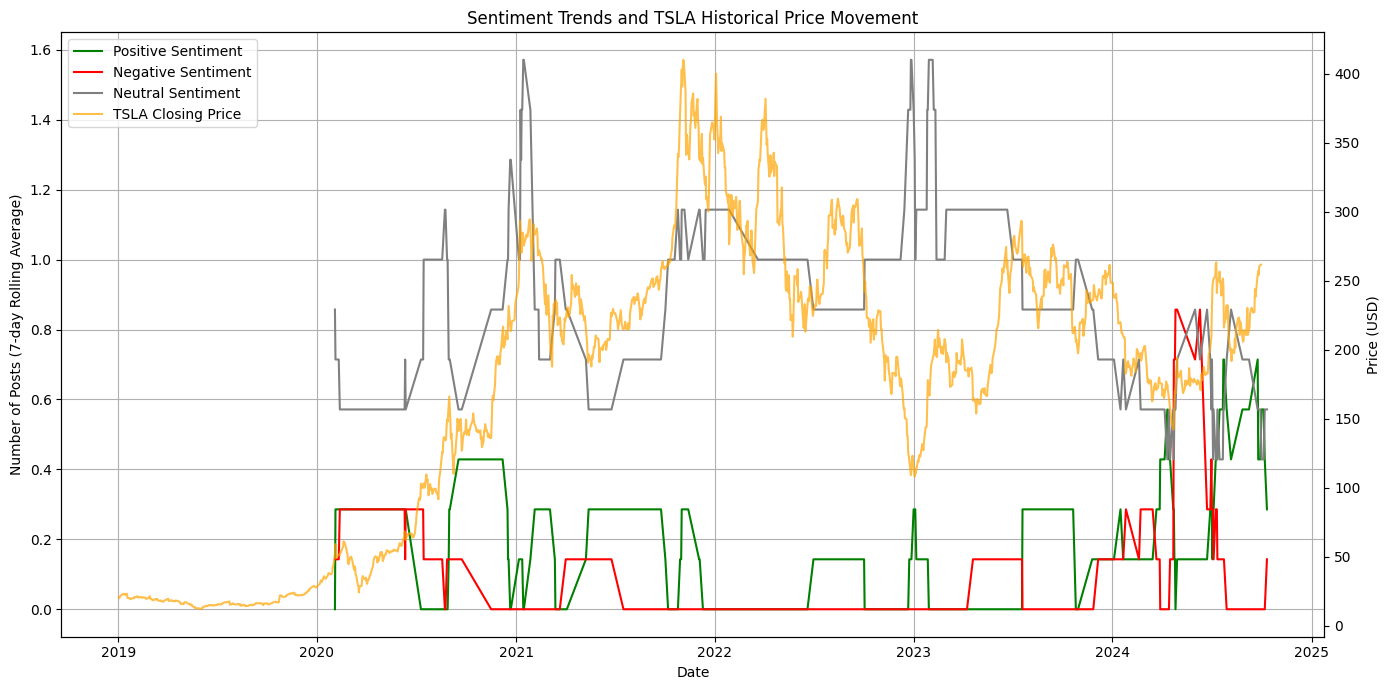

In [99]:
# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot sentiment trends on the first y-axis
ax1.plot(daily_sentiment['Created_At'], daily_sentiment['Positive_Rolling'], label='Positive Sentiment', color='green')
ax1.plot(daily_sentiment['Created_At'], daily_sentiment['Negative_Rolling'], label='Negative Sentiment', color='red')
ax1.plot(daily_sentiment['Created_At'], daily_sentiment['Neutral_Rolling'], label='Neutral Sentiment', color='gray')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Posts (7-day Rolling Average)')
ax1.set_title('Sentiment Trends and TSLA Historical Price Movement')
ax1.grid(True)
ax1.tick_params(axis='y')

# Create a second y-axis for the stock price
ax2 = ax1.twinx()
ax2.plot(dt2['Date'], dt2['Close'], label='TSLA Closing Price', color='orange', alpha=0.7)
ax2.set_ylabel('Price (USD)')
ax2.tick_params(axis='y')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

This graph is another visualization of sentiment trends related to Tesla (TSLA) alongside the historical price movement of the stock over time.It includes the following elements:

1. Positive Sentiment (Green Line): Represents the number of posts or mentions that express a positive sentiment about Tesla.
2. Negative Sentiment (Red Line): Indicates the number of posts with negative sentiment toward Tesla
3. Neutral Sentiment (Gray Line): Shows the number of neutral mentions/posts
4. TSLA Closing Price (Orange Line): The historical closing price of Tesla's stock over time (in USD) on the right y-axis.

INSIGHTS:

The stock price appears to have peaked around early 2022 and shows some volatility between 2022 and 2024, but overall it’s still on an upward trajectory.

 Increases in positive sentiment appear to align with bullish periods, while negative sentiment aligns with price corrections or drops.

There are more neutral posts during periods of large stock price movements, possibly reflecting the uncertainty or indecision in the market around Tesla’s stock during volatile periods.



# **FINDINGS**

**Insights on Price Changes Based on Social Media Sentiment
Weak Correlation Between Mentions and Price Changes:**

1.From the analysis we can find a weak positive correlation between mentions and price changes, suggesting that while more mentions may lead to price changes, it is not a significant predictor on its own. This implies that the volume of social media mentions alone does not strongly influence the stock price of TSLA.

2.The high number of neutral posts during volatile periods suggests that much of the conversation is informational, reflecting uncertainty or caution in the market. This could imply that during these times, there is no strong market consensus, and investors may be waiting for more clarity before making significant moves.
Sentiment Score Interpretation:

3.With an average sentiment score of 0.0600, the general sentiment around TSLA is slightly positive. This suggests that while there is some optimism, it is tempered by caution or uncertainty.


**Possible Buy/Sell Signals Based on Social Media Discussions**


Buy Signals:

1.Positive Sentiment with Rising Mentions:

If you notice increasing positive sentiment combined with an uptick in mentions, even if price changes are not yet reflecting this sentiment, it could signal a buy opportunity.
This suggests optimism that hasn’t fully been priced into the stock.

2.Neutral Sentiment and Price Stability During Bullish Periods:

During periods of price stability and neutral sentiment, investors might be cautiously optimistic.
A sudden shift in sentiment to positive, along with price consolidation, could suggest a bullish breakout is near, signaling a buy.

Sell Signals:

1.Negative Sentiment Spike:

An increase in negative sentiment may align with upcoming price corrections or drops.
If negative sentiment is rising while prices are peaking or showing volatility, this may signal a sell opportunity before a larger correction.

2.Neutral Posts in a Downtrend:

When neutral posts dominate during a price downtrend, it reflects indecision or uncertainty in the market.
This could indicate that investors are becoming wary, and it might be time to consider reducing positions or selling if no clear positive catalyst appears.



# **RECOMMENDATIONS**


Based on the analysis of sentiment and price changes, here are some actionable insights and suggestions for future improvements:

***Actionable Insights***

1**.Monitor Sentiment Trends:** Regular Monitoring of sentiment on platforms like Reddit to identify trends over time. Positive spikes in sentiment may be indicative of potential price increases. Pay attention to how price changes correlate with shifts in sentiment, especially following major news events or earnings reports.

2.**Risk Management:** Use sentiment analysis as a supplementary tool in risk management strategies. For example, if sentiment is overwhelmingly negative, it may be prudent to avoid investments until sentiment improves.

3.**Historical Performance Review:** Analyze historical performance data in conjunction with sentiment analysis to identify patterns and potential predictive indicators.


***Future Improvements***

1.**Integrate Data from Multiple Sources:** Incorporate sentiment analysis from financial news articles,Earning Report, different social media platforms to provide a more comprehensive view of market sentiment.This can help capture broader sentiment trends that may not be reflected in social media alone.

2.**Advanced Sentiment Analysis Techniques:** Implement more sophisticated NLP techniques to enhance sentiment analysis accuracy. These models can better understand context and nuances in language.

3.**Incorporate Additional Data Features:** Integrate traditional technical indicators (e.g., moving averages, RSI) with sentiment analysis to create a more holistic trading strategy.


By implementing these actionable insights and improvements, you can enhance your analysis of stock sentiment and its relationship with price movements, leading to more informed investment decisions and strategies.






